In [1]:
import cv2
import numpy as np

In [36]:
img1 = cv2.imread(r"E:\PyImage_ComputerVision\OpenCVBasic\WorkingData\InputData\bricks.png")
img2 = cv2.imread(r"E:\PyImage_ComputerVision\OpenCVBasic\WorkingData\InputData\valorant.png")

img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Image Gradients

## Image Gradient is defined as the Directional Change in the Image Intensity.

### Simply at each pixel of an Imput Image(GrayScale) Gradient measures the Change in Pixel Intensity in a Given Direction.
### By estimating the ORENTATION along with MAGNITUDE of Gradient,we are able to detect Edges.

## Now Image Gradients are the Fundamental Blocks of many Computer Vision applications and Image Processing Techniques.Example:-

### -->Its helps in Detecting Edges in Images and even helps us to Find Contours and Outline Detection in Images.
### -->Well Known Image Descriptors such as Histogram of Oriented Gradients and SIFT are Built upon Image Gradients.
### -->Image Gradients are used to construct Saliency maps,which are used to Highlight the Subject of the Image.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

# Process of Computing Image Gradients

### -->Image Gradient is calculated using Kernels(like smothing,blurring etc) as shown in the Image Given Below.

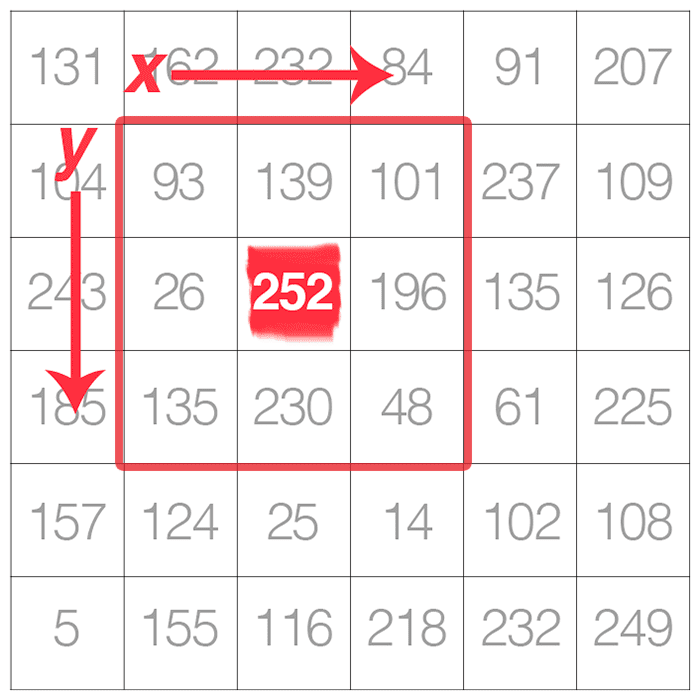

### -->As we can see the Kernel(3,3) is Represented in Red Color is on the Top of the Image.We need to Find the Difference between the Pixel Intensities in both X and Y Direction,within the Given Kernel Size.

### --->Before Calculating,The First Step is to Mark the North,South,West,East Pixels surrounding the Center Pixel of the Kernel.Example shown in Image Below:-

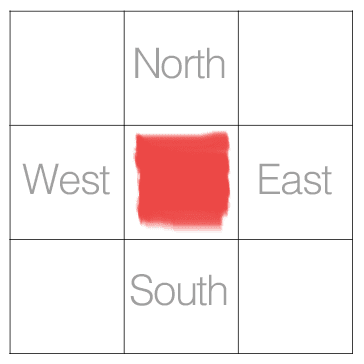

### --->As we can see the above Kernel is (3,3) Kenel .Now Assuming :-
### ~>Image as I  
### ~>Coordinates of Center Pixel of the Ketnel is (x,y)

### We can Calculate:-
### 1)North Pixel(Np) = [ x , y-1 ]
### 2)South Pixel(Sp) = [ x , y+1 ]
### 3)West Pixel(Wp) = [ x-1 , y ]
### 4)East Pixel(Ep) = [ x+1 , y ]

### ---> After Calculating the Above Values we will now Calculate:-

### ~>Gx(Vertical Change of Intensities) = Sp - Np
### ~>Gy(Horizontal Change of Intensities) = Ep - Wp

### -->After Calculating Gx and Gy we can easily Calculate `Gradient Magnitude` and `Gradient Orientation`

### ~>`Gradient Magnitude`(G) = Square Root( Gx * Gx + Gy * Gy)

### ~>`Gradient Orientation` = arctan2( Gx * Gy) * (180/ PI ) 

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Computing Image Gradient Using Scharr and Sobel Kernels

## We can use Kernels Desgined by Computer Vision Enginners to Approximately calculate the Image Gradients.

## The Two Kernels we can use are:-

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Sobel Kernel

### It has 2 Kernels to Calculates the Gx and  Gy , shown in the Image below:-

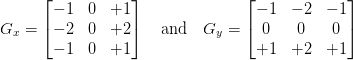

### We use `cv2.Sobel()` Method to Calculate the Image Gradients using the Sobel Kernel

### For `cv2.Sobel()` Method:-

### < First Argument >:-It takes the NUMPY Array of the Input Image we want to calculate the Image Gradients.
### < Second Argument >(ddepth):-It takes Output Image Depth Flags.More the Depth the Better the Results will be.
### < Third Argument >(dx):-It takes the Order of Derivative X.
### < Fourth Argument >(dy):-It takes the Order of Derivative Y.
### < Fifth Argument >(ksize):-It takes the Kernel Size for the Sobel Kernel.Values should be 1,3,5 or 7.(Best Value is 3)

#### cv2.Sobel() :-[LINK](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

#### Output Image Depth Flags :-[LINK](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#filter_depths)

#### cv2.convertScaleAbs() :-[LINK](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d)

### ** NOTE:-We can calculate Image Gradient for both Colored and Gray Scale Images but its better to calculate only for Gray Scale Images

In [3]:
img1_Sobgx32 = cv2.Sobel(img1_gray,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=3)

### In the Above Cell we are calculating Gx by supplying dx=1 and dy=0 using 32 Bit Float Precision.

In [4]:
img1_Sobgx32

array([[  0.,  18.,  38., ..., -26., -48.,   0.],
       [  0.,  25.,  34., ..., -17., -33.,   0.],
       [  0.,  24.,  19., ...,  -4.,  -9.,   0.],
       ...,
       [  0.,  18.,  23., ..., -30., -18.,   0.],
       [  0.,  22.,  23., ..., -34., -21.,   0.],
       [  0.,  26.,  24., ..., -30., -14.,   0.]], dtype=float32)

In [5]:
np.max(img1_Sobgx32)

690.0

In [6]:
np.min(img1_Sobgx32)

-783.0

### We can see in Above Cell that by using Depth as cv2.CV_32F we have Gradient Value above the Normal Pixel Range.
### Hence we clamp them into Normal uint8 using `cv2.convertScaleAbs()`

In [7]:
img1_NSobgx32 = cv2.convertScaleAbs(img1_Sobgx32)

In [8]:
img1_NSobgx32

array([[ 0, 18, 38, ..., 26, 48,  0],
       [ 0, 25, 34, ..., 17, 33,  0],
       [ 0, 24, 19, ...,  4,  9,  0],
       ...,
       [ 0, 18, 23, ..., 30, 18,  0],
       [ 0, 22, 23, ..., 34, 21,  0],
       [ 0, 26, 24, ..., 30, 14,  0]], dtype=uint8)

In [9]:
cv2.imshow("GrayScale Image",img1_gray)
cv2.imshow("Gx 32",img1_NSobgx32)
cv2.waitKey(0)
cv2.destroyAllWindows()

### After Clamping we can view the Gx and obverse the Image Gradient Change in X Direction

In [10]:
img1_Sobgy32 = cv2.Sobel(img1_gray,ddepth=cv2.CV_32F,dx=0,dy=1,ksize=3)

### In the Above Cells we are Calculating Gy by supplying dx=0 and dy=1 using 32 Bit Float Precision

In [11]:
img1_Sobgy32

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [-276., -269., -266., ..., -333., -309., -294.],
       [-318., -326., -345., ..., -194., -181., -172.],
       ...,
       [   8.,    8.,    7., ...,  -16.,  -34.,  -44.],
       [ -28.,  -24.,  -19., ...,  -28.,  -17.,  -10.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]], dtype=float32)

In [12]:
np.max(img1_Sobgy32)

973.0

In [13]:
np.min(img1_Sobgy32)

-1005.0

### We can see in the Above Cells that by using Depth as cv2.CV_32F we have Gradient Value above Normal Pixel Range
### Hence we are Clamping them into Normal Range Using `cv2.convertScaleAbs()`

In [14]:
img1_NSobgy32 = cv2.convertScaleAbs(img1_Sobgy32)

In [15]:
img1_NSobgy32

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 194, 181, 172],
       ...,
       [  8,   8,   7, ...,  16,  34,  44],
       [ 28,  24,  19, ...,  28,  17,  10],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [16]:
cv2.imshow("GrayScale Image",img1_gray)
cv2.imshow("Gy 32",img1_NSobgy32)
cv2.waitKey(0)
cv2.destroyAllWindows()

### After Clamping we can view the Gy and observe the Image Gradient Change in Y Direction 

In [17]:
img1_Comb32 = cv2.addWeighted(img1_NSobgx32,0.5,img1_NSobgy32,0.5,0)
img1_CombFull32 = cv2.add(img1_NSobgx32,img1_NSobgy32)

In [18]:
cv2.imshow("GrayScale Image",img1_gray)
cv2.imshow("Gx 32",img1_NSobgx32)
cv2.imshow("Gy 32",img1_NSobgy32)
cv2.imshow("Combined 32",img1_Comb32)
cv2.imshow("Combined Full",img1_CombFull32)
cv2.waitKey(0)
cv2.destroyAllWindows()

### In the Above Cell we Combined the Gx and Gy Gradients to view the Full Image Gradient of the Image

In [33]:
img1_Sobgx1 = cv2.Sobel(img1_gray,ddepth=-1,dx=1,dy=0,ksize=3)
img1_Sobgy1 = cv2.Sobel(img1_gray,ddepth=-1,dx=0,dy=1,ksize=3)
img1_NSobgx1 = cv2.convertScaleAbs(img1_Sobgx1)
img1_NSobgy1 = cv2.convertScaleAbs(img1_Sobgy1)
img1_Comb1 = cv2.addWeighted(img1_NSobgx1,0.5,img1_NSobgy1,0.5,0)
img1_CombFull1 = cv2.add(img1_NSobgx1,img1_NSobgy1)

### In the Above Cell we calculated the Sobel Image Gradient with ddepth=-1(Use the Default Depth of the Input Image)

In [34]:
img1_Sobgx64 = cv2.Sobel(img1_gray,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=3)
img1_Sobgy64 = cv2.Sobel(img1_gray,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=3)
img1_NSobgx64 = cv2.convertScaleAbs(img1_Sobgx64)
img1_NSobgy64 = cv2.convertScaleAbs(img1_Sobgy64)
img1_Comb64 = cv2.addWeighted(img1_NSobgx64,0.5,img1_NSobgy64,0.5,0)
img1_CombFull64 = cv2.add(img1_NSobgx64,img1_NSobgy64)

###  In the Above Image we calculated the Sobel Image Gradient with Depth as 64 Bit Float Precision

In [35]:
cv2.imshow("Gray Scale Image",img1_gray)
cv2.imshow("Gx 32",img1_NSobgx32)
cv2.imshow("Gy 32",img1_NSobgy32)
cv2.imshow("Combined 32",img1_Comb32)
cv2.imshow("Combined 32 Full",img1_CombFull32)

cv2.imshow("Gx 1",img1_NSobgx1)
cv2.imshow("Gy 1",img1_NSobgy1)
cv2.imshow("Combined 1",img1_Comb1)
cv2.imshow("Combined 1 Full",img1_CombFull1)

cv2.imshow("Gx 64",img1_NSobgx64)
cv2.imshow("Gy 64",img1_NSobgy64)
cv2.imshow("Combined 64",img1_Comb64)
cv2.imshow("Combined 64 Full",img1_CombFull64)

cv2.waitKey(0)
cv2.destroyAllWindows()

### In the Above Cell we compared all the Different Image Gradient(with Different ddepth) that we can notice that we obtained Better and Detailed Results for Higher Precision Depth.

### -->Results of `cv2.CV_64F`  >  `cv2.CV_32F`  >  `ddepth=-1(np.unit8)`

### We can also Use Sobel Kernel with Different Dimension

In [37]:
cv2.namedWindow("GrayScale Image",cv2.WINDOW_NORMAL)
cv2.imshow("GrayScale Image",img2_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
img2_gxk3 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=3)
img2_gyk3 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=3)
img2_gxk3 = cv2.convertScaleAbs(img2_gxk3)
img2_gyk3 = cv2.convertScaleAbs(img2_gyk3)
img2_combk3 = cv2.addWeighted(img2_gxk3,0.5,img2_gyk3,0.5,0)
img2_combFullk3 = cv2.add(img2_gxk3,img2_gyk3)

img2_gxk5 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)
img2_gyk5 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5)
img2_gxk5 = cv2.convertScaleAbs(img2_gxk5)
img2_gyk5 = cv2.convertScaleAbs(img2_gyk5)
img2_combk5 = cv2.addWeighted(img2_gxk5,0.5,img2_gyk5,0.5,0)
img2_combFullk5 = cv2.add(img2_gxk5,img2_gyk5)

img2_gxk7 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=7)
img2_gyk7 = cv2.Sobel(img2_gray,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=7)
img2_gxk7 = cv2.convertScaleAbs(img2_gxk7)
img2_gyk7 = cv2.convertScaleAbs(img2_gyk7)
img2_combk7 = cv2.addWeighted(img2_gxk7,0.5,img2_gyk7,0.5,0)
img2_combFullk7 = cv2.add(img2_gxk7,img2_gyk7)

In [40]:
cv2.namedWindow("GS",cv2.WINDOW_NORMAL)
cv2.namedWindow("Gx K3",cv2.WINDOW_NORMAL)
cv2.namedWindow("Gy K3",cv2.WINDOW_NORMAL)
cv2.namedWindow("C K3",cv2.WINDOW_NORMAL)
cv2.namedWindow("CF K3",cv2.WINDOW_NORMAL)

cv2.namedWindow("Gx K5",cv2.WINDOW_NORMAL)
cv2.namedWindow("Gy K5",cv2.WINDOW_NORMAL)
cv2.namedWindow("C K5",cv2.WINDOW_NORMAL)
cv2.namedWindow("CF K5",cv2.WINDOW_NORMAL)

cv2.namedWindow("Gx K7",cv2.WINDOW_NORMAL)
cv2.namedWindow("Gy K7",cv2.WINDOW_NORMAL)
cv2.namedWindow("C K7",cv2.WINDOW_NORMAL)
cv2.namedWindow("CF K7",cv2.WINDOW_NORMAL)

cv2.imshow("GS",img2_gray)
cv2.imshow("Gx K3",img2_gxk3)
cv2.imshow("Gy K3",img2_gyk3)
cv2.imshow("C K3",img2_combk3)
cv2.imshow("CF K3",img2_combFullk3)

cv2.imshow("Gx K5",img2_gxk5)
cv2.imshow("Gy K5",img2_gyk5)
cv2.imshow("C K5",img2_combk5)
cv2.imshow("CF K5",img2_combFullk5)

cv2.imshow("Gx K7",img2_gxk7)
cv2.imshow("Gy K7",img2_gyk7)
cv2.imshow("C K7",img2_combk7)
cv2.imshow("CF K7",img2_combFullk7)

cv2.waitKey(0)
cv2.destroyAllWindows()

### In the Above Cells we tried Sobel Kernels With Dimensions (3,3) , (5,5) , (7,7) .And we can notice that:-

### -->We will obtain the Better Results with Kernel of (3,3) Or Less Dimension(irrespective of the image size) 

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Scharr Kernel

### It has 2 Kernel used to Calculate Gx and Gy, Shown in the Image below:- 

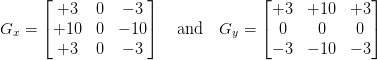

### We use `cv2.Scharr() Method ` to Calculate Image Gradient using Scharr Method

### For `cv2.Scharr()` Method:-

### < First Argument >:-It takes the NUMPY Array of the Input Image we want to calculate the Image Gradients.
### < Second Argument >(ddepth):-It takes Output Image Depth Flags.More the Depth the Better the Results will be.
### < Third Argument >(dx):-It takes the Order of Derivative X.
### < Fourth Argument >(dy):-It takes the Order of Derivative Y

#### cv2.Scharr() :-[LINK](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaa13106761eedf14798f37aa2d60404c9)

#### Output Image Depth Flags :-[LINK](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#filter_depths)

#### cv2.convertScaleAbs() :-[LINK](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d)

### ** NOTE:-We can calculate Image Gradient for both Colored and Gray Scale Images but its better to calculate only for Gray Scale Images
###  **NOTE:-Unlike Sobel Method Scharr has Fixed Dimensions.
###  **NOTE:-All the ways of Calculating Gx and Gy are same as the Sobel Way.

In [42]:
img1_Scagx32 = cv2.Scharr(img1_gray,ddepth=cv2.CV_32F,dx=1,dy=0)
img1_Scagy32 = cv2.Scharr(img1_gray,ddepth=cv2.CV_32F,dx=0,dy=1)
img1_Scagx32 = cv2.convertScaleAbs(img1_Scagx32)
img1_Scagy32 = cv2.convertScaleAbs(img1_Scagy32)
img1_ScaComb32 = cv2.addWeighted(img1_Scagx32,0.5,img1_Scagy32,0.5,0)
img1_ScaCombFull32 = cv2.add(img1_Scagx32,img1_Scagy32)

### In the Above Cell we Calculated the Scharr Image Gradient using Depth as 32 Bit Float Precision

In [43]:
img1_Scagx1 = cv2.Scharr(img1_gray,ddepth=-1,dx=1,dy=0)
img1_Scagy1 = cv2.Scharr(img1_gray,ddepth=-1,dx=0,dy=1)
img1_Scagx1 = cv2.convertScaleAbs(img1_Scagx1)
img1_Scagy1 = cv2.convertScaleAbs(img1_Scagy1)
img1_ScaComb1 = cv2.addWeighted(img1_Scagx1,0.5,img1_Scagy1,0.5,0)
img1_ScaCombFull1 = cv2.add(img1_Scagx1,img1_Scagy1)

### In the Above Cells we Calculated the Schaar Image Gradient using ddepth = -1(which means use the default input image depth that is np.uint8)

In [44]:
img1_Scagx64 = cv2.Scharr(img1_gray,ddepth=cv2.CV_64F,dx=1,dy=0)
img1_Scagy64 = cv2.Scharr(img1_gray,ddepth=cv2.CV_64F,dx=0,dy=1)
img1_Scagx64 = cv2.convertScaleAbs(img1_Scagx64)
img1_Scagy64 = cv2.convertScaleAbs(img1_Scagy64)
img1_ScaComb64 = cv2.addWeighted(img1_Scagx64,0.5,img1_Scagy64,0.5,0)
img1_ScaCombFull64 = cv2.add(img1_Scagx64,img1_Scagy64)

###  In the Above Cells we Calculated the Schaar Image Gradient using Depth as 64 Bit Float Precision

In [47]:
cv2.imshow("GrayScale Image",img1_gray)

cv2.imshow("Gx 32",img1_Scagx32)
cv2.imshow("Gy 32",img1_Scagy32)
cv2.imshow("Combined 32",img1_ScaComb32)
cv2.imshow("Combined Full 32",img1_ScaCombFull32)

cv2.imshow("Gx 64",img1_Scagx64)
cv2.imshow("Gy 64",img1_Scagy64)
cv2.imshow("Combined 64",img1_ScaComb64)
cv2.imshow("Combined Full 64",img1_ScaCombFull64)

cv2.imshow("Gx 1",img1_Scagx1)
cv2.imshow("Gy 1",img1_Scagy1)
cv2.imshow("Combined 1",img1_ScaComb1)
cv2.imshow("Combined Full 1",img1_ScaCombFull1)
           
cv2.waitKey(0)
cv2.destroyAllWindows()

### In the Above Cell we compared all the Different Image Gradient(with Different ddepth) that we can notice that we obtained Better and Detailed Results for Higher Precision Depth.

### -->Results of `cv2.CV_64F`  >  `cv2.CV_32F`  >  `ddepth=-1(np.unit8)`

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Comparing the Results of both Scharr and Sobel Image Gradients

In [48]:
cv2.imshow("Scharr Gx32",img1_Scagx32)
cv2.imshow("Sobel Gx32",img1_NSobgx32)
cv2.imshow("Combined Scharr 32",img1_ScaComb32)
cv2.imshow("Combined Sobel 32",img1_Comb32)
cv2.imshow("Combined Full Scharr 32",img1_ScaCombFull32)
cv2.imshow("Combined Full Sobel 32",img1_CombFull32)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
cv2.imshow("Scharr Gx64",img1_Scagx64)
cv2.imshow("Sobel Gx64",img1_NSobgx64)
cv2.imshow("Combined Scharr 64",img1_ScaComb64)
cv2.imshow("Combined Sobel 64",img1_Comb64)
cv2.imshow("Combined Full Scharr 64",img1_ScaCombFull64)
cv2.imshow("Combined Full Sobel 64",img1_CombFull64)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
cv2.imshow("Scharr Gx1",img1_Scagx1)
cv2.imshow("Sobel Gx1",img1_NSobgx1)
cv2.imshow("Combined Scharr 1",img1_ScaComb1)
cv2.imshow("Combined Sobel 1",img1_Comb1)
cv2.imshow("Combined Full Scharr 1",img1_ScaCombFull1)
cv2.imshow("Combined Full Sobel 1",img1_CombFull1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### We can see that after Comparing the Sobel and Scharr Results:-

### -->Scharr Results are more Noisy but also Contains More Details.
### -->Hence which method to use is Basically dependent on the Need,But Normally Scharr is Better as it produces more Detailed Results.

### --------------------------------------------------------------------------------------------------------------------------------------------------------